Idea is to predict song popularity based on given parameters. 
Problem can be found on link below
https://www.kaggle.com/c/sliced-s01e08-KJSEks/overview

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing   import MinMaxScaler as mnx 

import warnings
warnings.filterwarnings('ignore')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SLICED Prediction - Kaggle/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SLICED Prediction - Kaggle/test.csv')
artist = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SLICED Prediction - Kaggle/artists.csv')

In [ ]:
test_orig = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SLICED Prediction - Kaggle/test.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                21000 non-null  int64  
 1   name              20999 non-null  object 
 2   popularity        21000 non-null  int64  
 3   duration_ms       21000 non-null  float64
 4   artists           21000 non-null  object 
 5   id_artists        21000 non-null  object 
 6   danceability      21000 non-null  float64
 7   energy            21000 non-null  float64
 8   key               21000 non-null  int64  
 9   loudness          21000 non-null  float64
 10  speechiness       21000 non-null  float64
 11  acousticness      21000 non-null  float64
 12  instrumentalness  21000 non-null  float64
 13  liveness          21000 non-null  float64
 14  valence           21000 non-null  float64
 15  tempo             21000 non-null  float64
 16  release_year      21000 non-null  int64 

In [ ]:
train.describe()

,id,popularity,duration_ms,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_year,release_month,release_day
count,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,16098.000000,16014.000000
mean,15027.205286,27.579857,2.289981e+05,0.563132,0.538958,5.230905,-10.256135,0.105387,0.454218,0.114954,0.213896,0.550881,118.255317,1988.532667,5.539197,11.260959
std,8664.168081,18.475994,1.279665e+05,0.167356,0.251400,3.527536,5.090703,0.181779,0.350103,0.269436,0.184015,0.258496,29.823724,22.991659,4.022609,10.181738
min,3.000000,0.000000,7.523000e+03,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1922.000000,1.000000,1.000000
25%,7514.750000,13.000000,1.755630e+05,0.450000,0.340000,2.000000,-12.939750,0.033900,0.096300,0.000000,0.098500,0.345750,95.341750,1974.000000,1.000000,1.000000
50%,14993.500000,27.000000,2.149060e+05,0.578000,0.544000,5.000000,-9.297000,0.044100,0.431000,0.000024,0.139000,0.563000,117.164500,1992.000000,5.000000,9.000000
75%,22600.250000,41.000000,2.628965e+05,0.686000,0.744000,8.000000,-6.509000,0.076225,0.792000,0.009370,0.279000,0.768250,136.049750,2008.000000,9.000000,20.000000
max,30000.000000,94.000000,4.792587e+06,0.985000,1.000000,11.000000,4.584000,0.970000,0.996000,1.000000,0.997000,1.000000,240.782000,2021.000000,12.000000,31.000000


In [ ]:
print('Max Duration of Song (in micro second): ',train.duration_ms.max())
print('Least Duration of Song (in micro second): ',train.duration_ms.min())
print('Mediam Duration of Song (in micro second): ',train.duration_ms.median())
print('Mean Duration of Song (in micro second): ',train.duration_ms.mean())

Max Duration of Song (in micro second):  4792587.0
Least Duration of Song (in micro second):  7523.0
Mediam Duration of Song (in micro second):  214906.0
Mean Duration of Song (in micro second):  228998.0798095238


In [ ]:
train['duration_mins'] = train.duration_ms / 60000
test['duration_mins']  = test.duration_ms / 60000

In [ ]:
def plotfun(x,y,title):
  fig,ax = plt.subplots(1,4,squeeze=False,figsize=(20,10))
  #fig = plt.figure(figsize=(20,20))

  plt.subplot(141)
  sns.scatterplot(x,y)
  plt.suptitle(title,fontsize=30)

  ax1 = plt.subplot(142)
  sns.boxplot(y=x)
  ax1.title.set_text('Box Plot')
  ax2 = plt.subplot(143)
  ax2.get_yaxis().set_visible(True)
  ax2.title.set_text('Violin Plot')
  sns.violinplot(y=x)


  ax3 = plt.subplot(144)
  ax3 = sns.histplot(x)
  ax3.title.set_text('Distribution')

  plt.show()


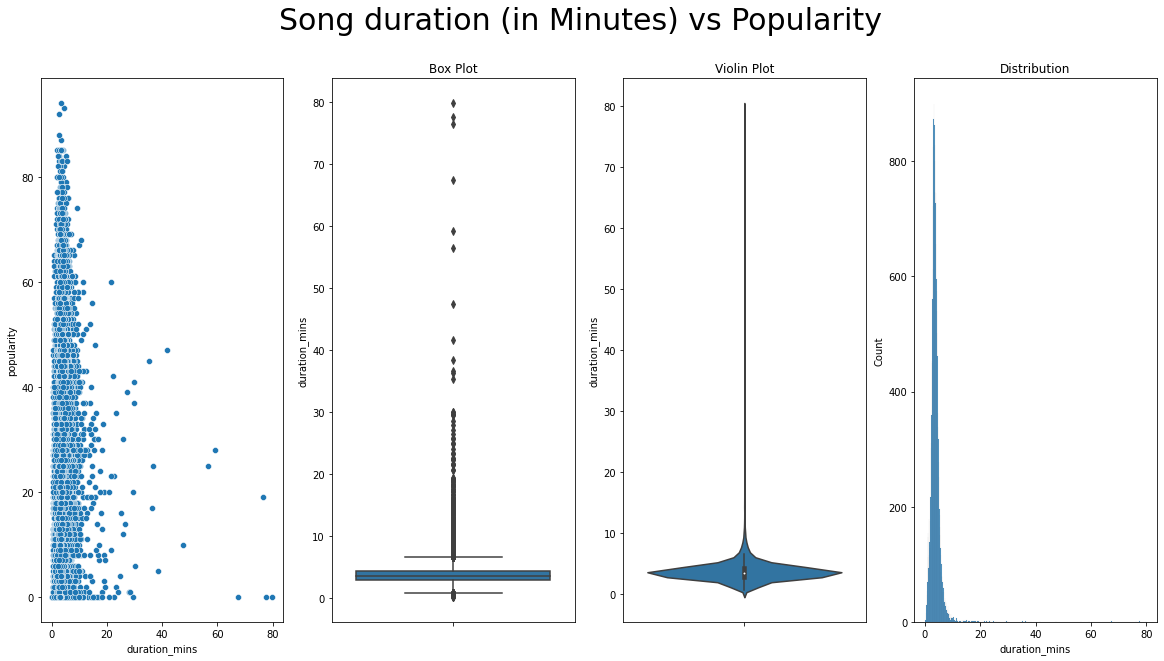

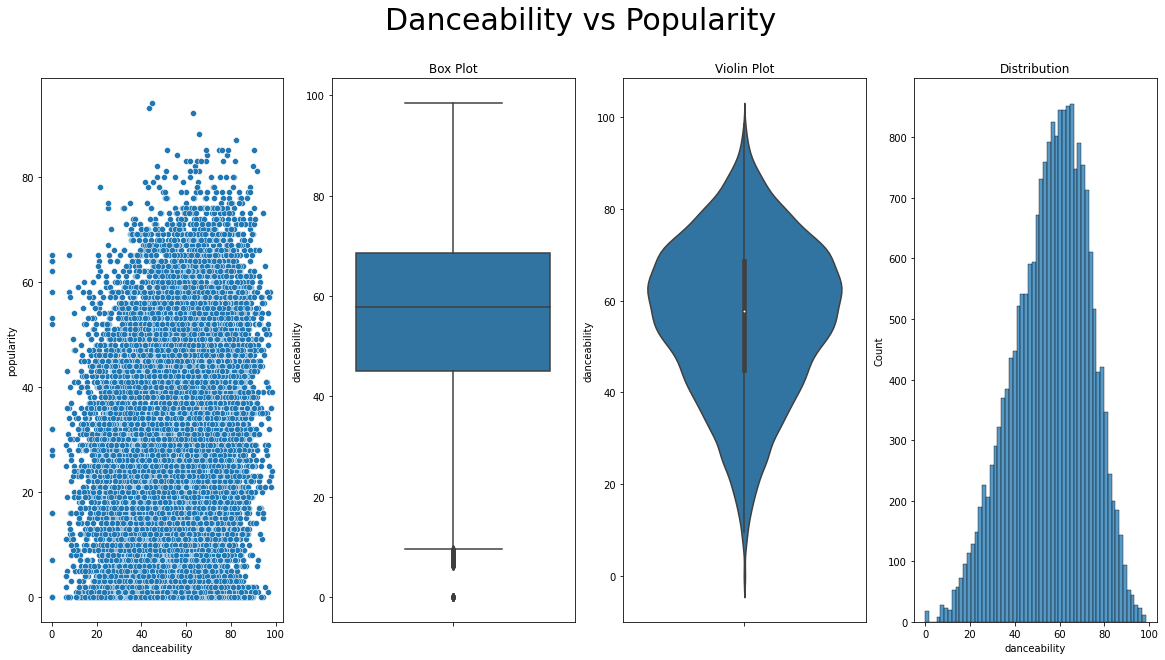

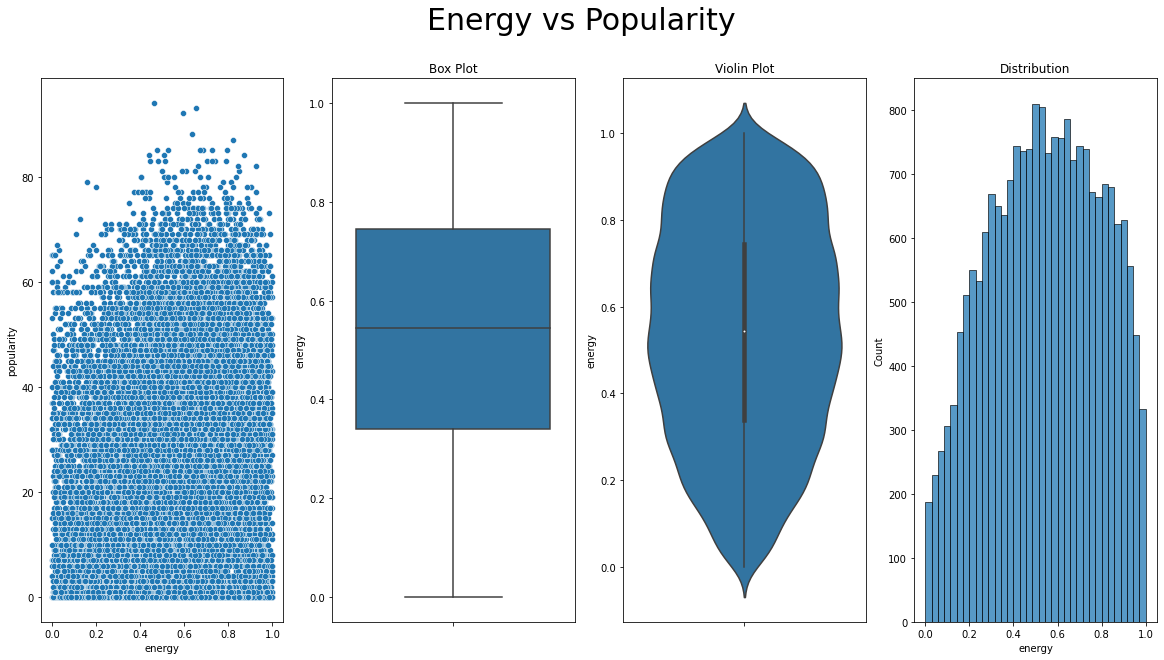

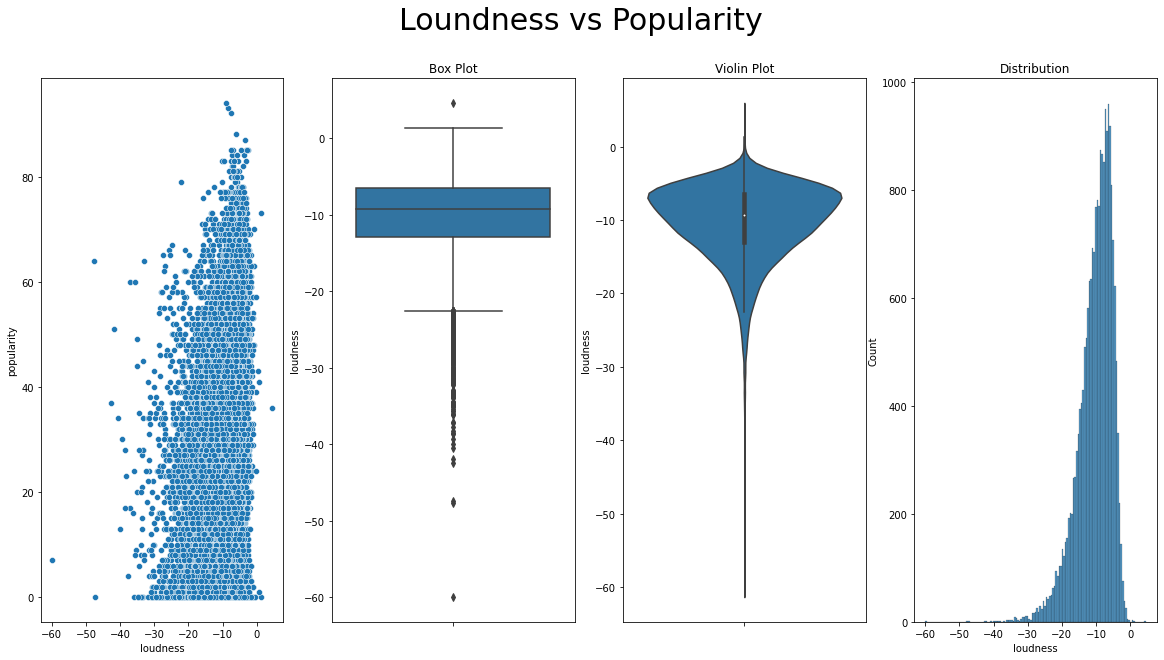

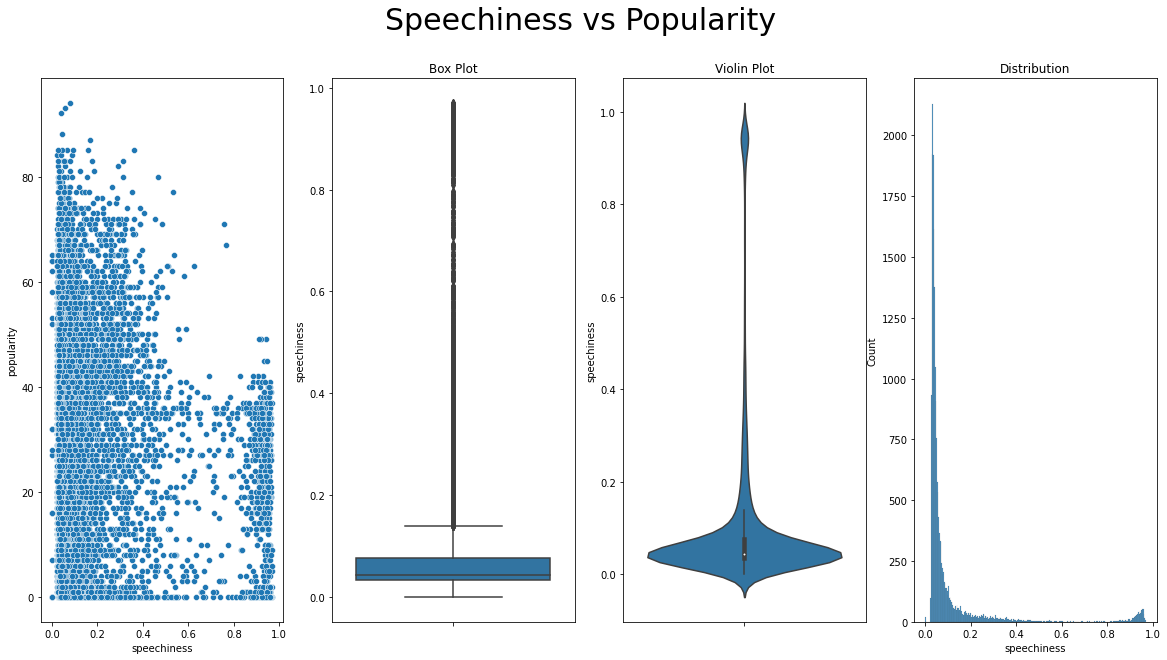

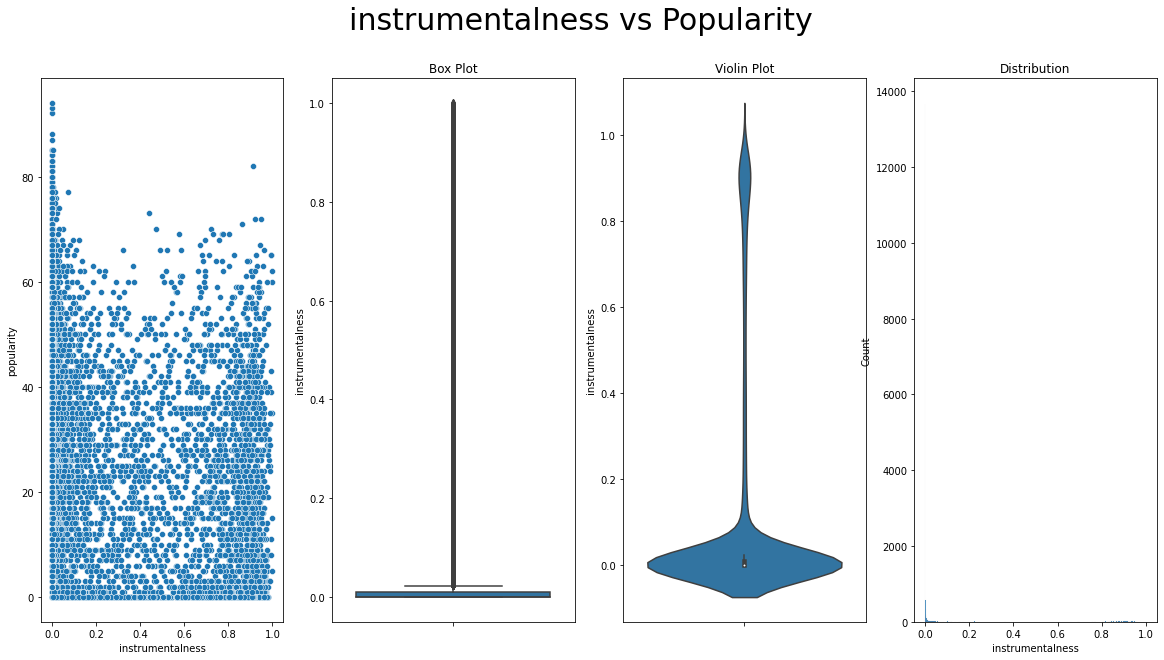

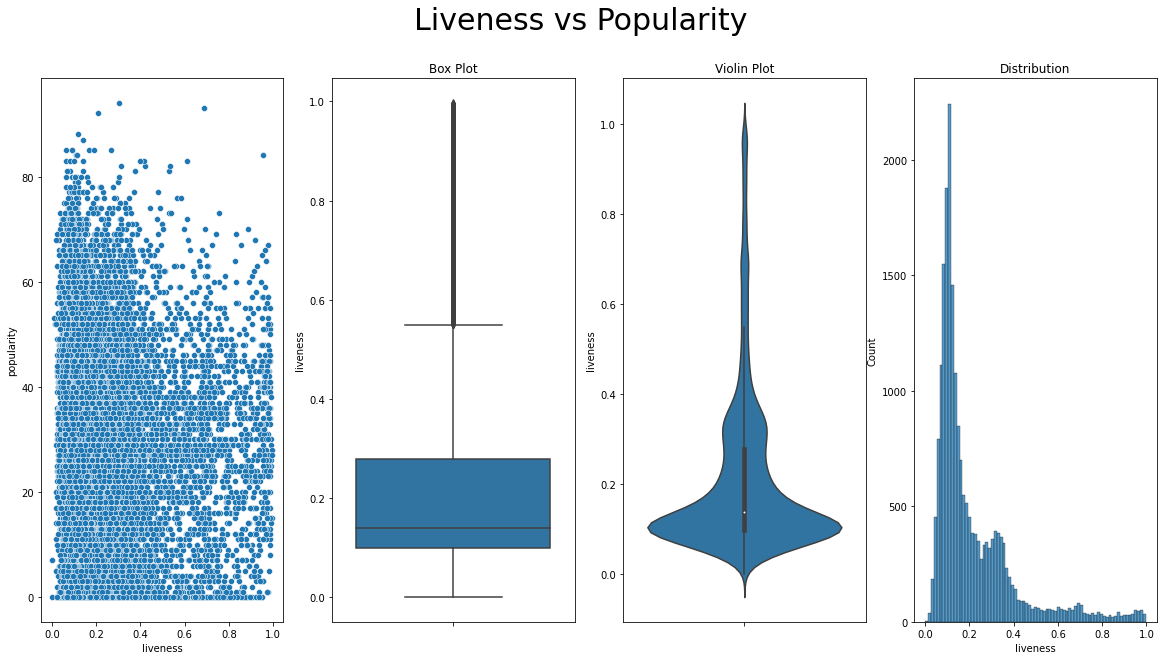

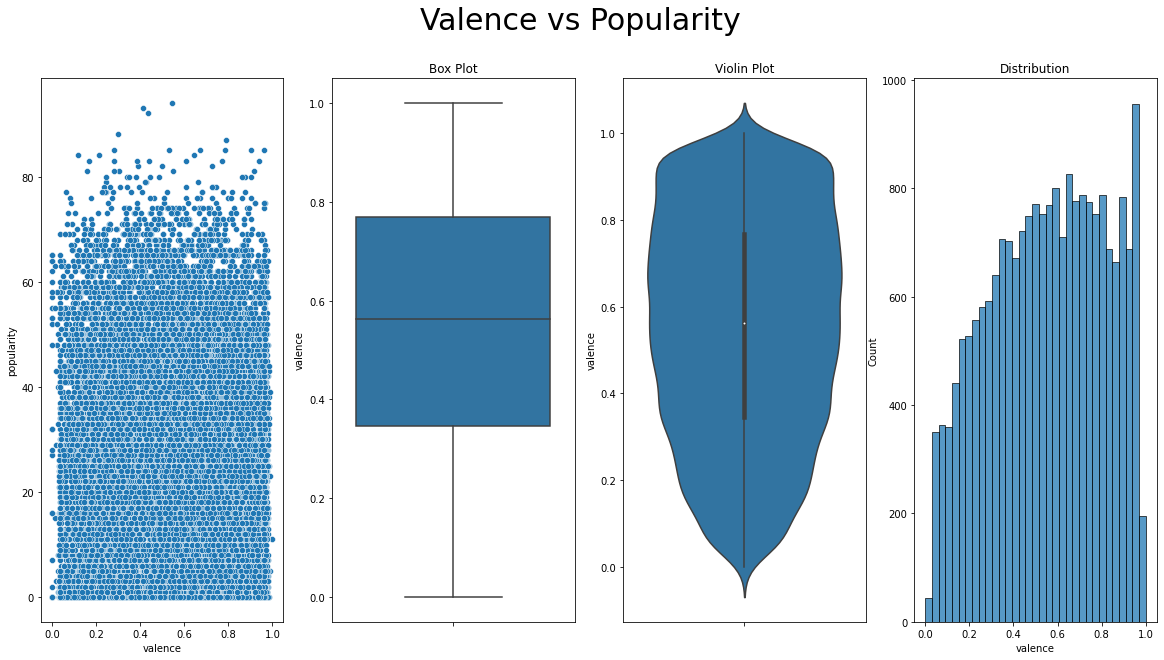

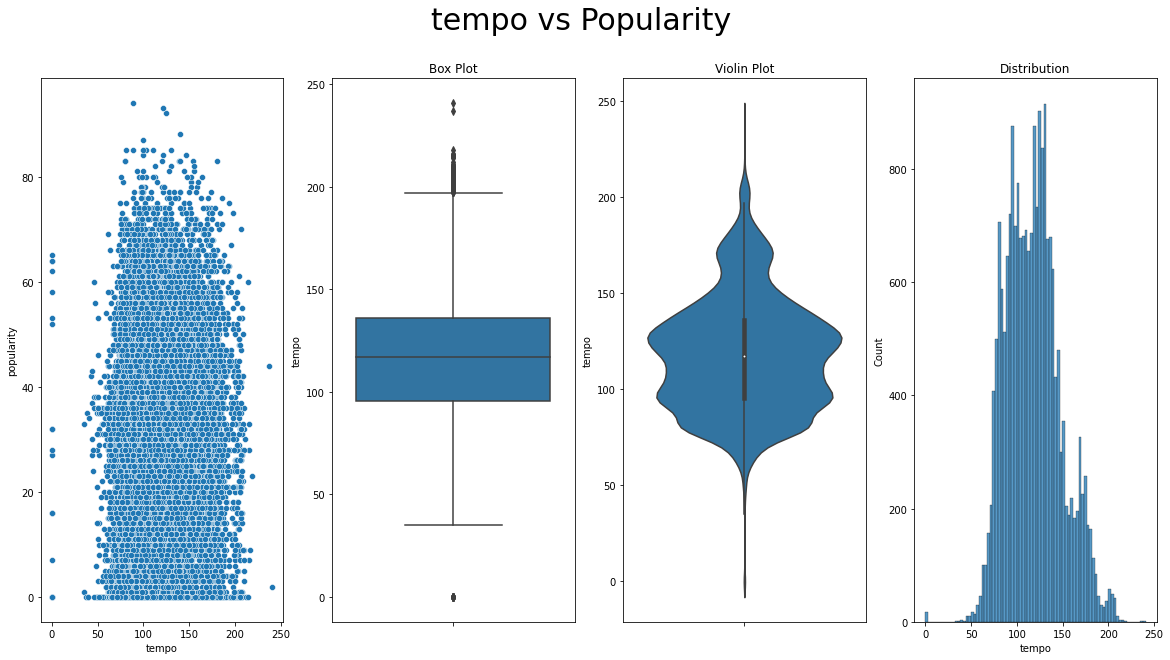

In [ ]:
plotfun(train.duration_mins,train.popularity,'Song duration (in Minutes) vs Popularity')
plotfun(train.danceability * 100,train.popularity,'Danceability vs Popularity')
plotfun(train.energy,train.popularity,'Energy vs Popularity')
plotfun(train.loudness,train.popularity,'Loundness vs Popularity')
plotfun(train.speechiness,train.popularity,'Speechiness vs Popularity')
plotfun(train.instrumentalness,train.popularity,'instrumentalness vs Popularity')
plotfun(train.liveness,train.popularity,'Liveness vs Popularity')
plotfun(train.valence,train.popularity,'Valence vs Popularity')
plotfun(train.tempo,train.popularity,'tempo vs Popularity')

- Many outliers for song duration
- Most of the songs are under 20 minutes duration


- Popularity is well distributed with dancebility. 
- there are few outliers
- Column is well distributed


- Popularity is well distributed with Energy
- No outliers visibile
- Column is well distributed


- most of songs are on higher loudness side
- Higher loudness has more popularity
- there are outliers


- Speechiness is well distributed across popularity
- There are many outliers and hence, data is skewed


- Instrumentalness and liveness is well distributed across popularity
- There are many outliers and hence, data is skewed


- Valence and Tempo does not have outliers
- Are well distributed


In [ ]:
q1 = train.quantile(.25)
q3 = train.quantile(.75)
iqr = q3-q1

outlirs = ((train < (q1 - 1.5* iqr)) | (train > (q3 + 1.5* iqr)))
print('Number of outliers are ',(outlirs.apply(lambda a: sum(a),axis=1) > 0).sum())

Number of outliers are  8575


In [ ]:
print('Number of outliers in each column')
outlirs.sum()

Number of outliers in each column


acousticness           0
artists                0
danceability          66
duration_mins        990
duration_ms          990
energy                 0
id                     0
id_artists             0
instrumentalness    4606
key                    0
liveness            1471
loudness             535
name                   0
popularity            14
release_day            0
release_month          0
release_year           5
speechiness         2995
tempo                224
valence                0
dtype: int64

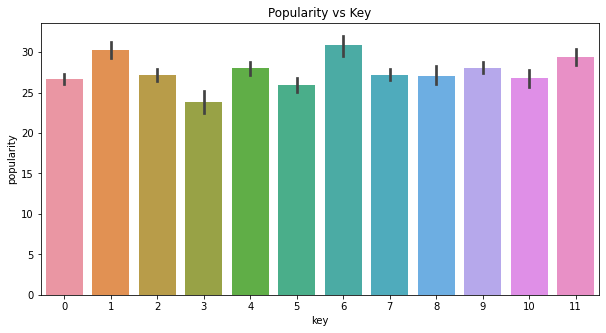

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Popularity vs Key')
sns.barplot(train.key,train.popularity)

There isn't much variation between Keys and Popularity

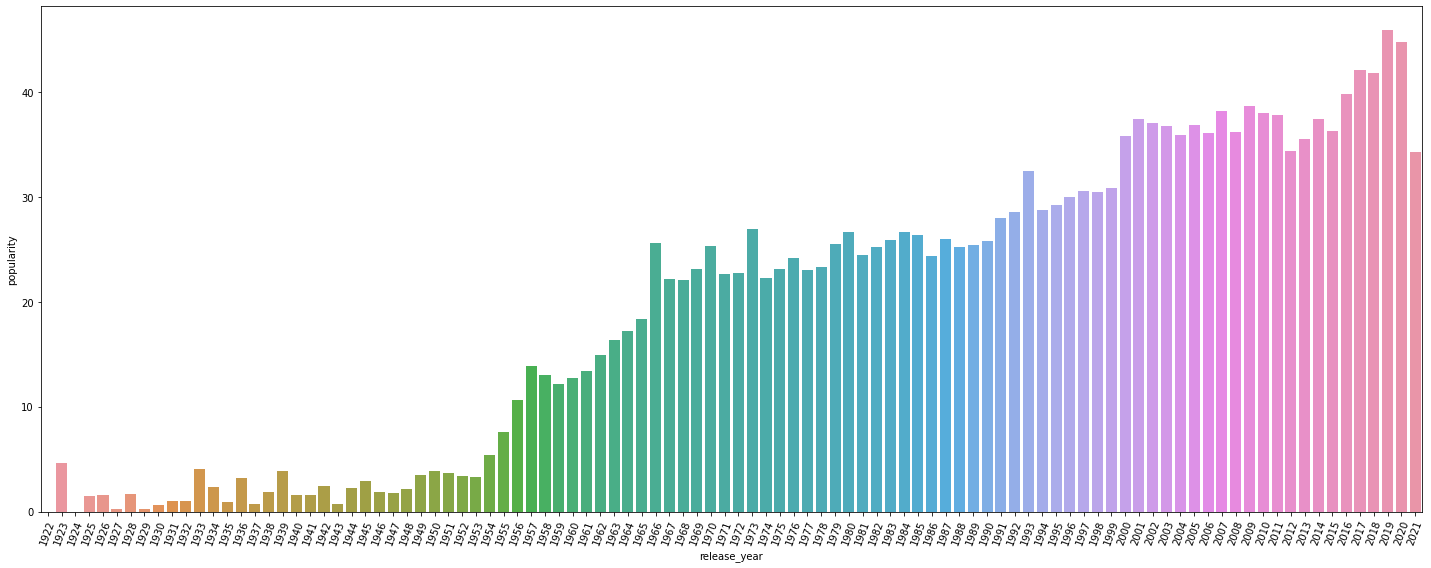

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(train.release_year,train.popularity,ci=None)
plt.xticks(rotation=70)
plt.tight_layout()

Overall, popularity appears to be increasing with year

In [ ]:
train.isnull().sum()

id                     0
name                   1
popularity             0
duration_ms            0
artists                0
id_artists             0
danceability           0
energy                 0
key                    0
loudness               0
speechiness            0
acousticness           0
instrumentalness       0
liveness               0
valence                0
tempo                  0
release_year           0
release_month       4902
release_day         4986
duration_mins          0
dtype: int64

Release Month and Year has most missing values. We will not use these column. Name has one missing value, we not going to use that either

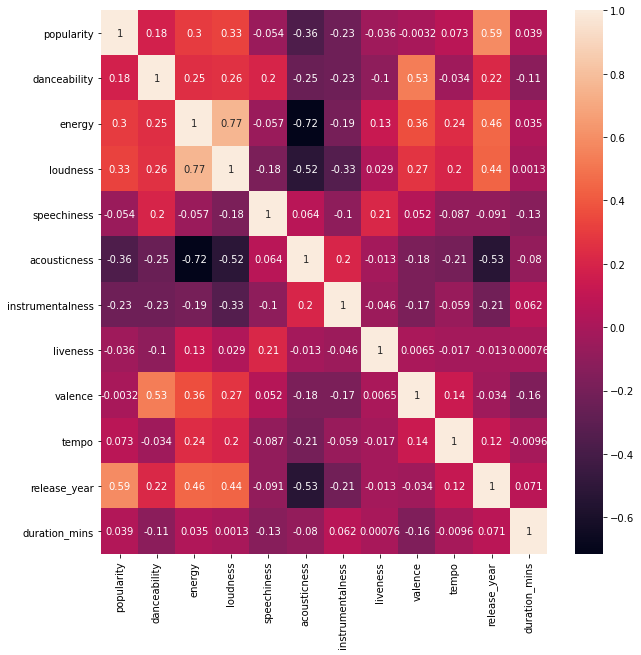

In [ ]:
plt.figure(figsize=(10,10))
df_sub = train.iloc[:,[2,6,7,9,10,11,12,13,14,15,16,19]]
corr_mat = df_sub.corr()
sns.heatmap(corr_mat,annot=True)
plt.show()

Since Year has high correlation with Popularity, we need to utilize that column.
We can break the years in 1980's,1990' and so on

In [ ]:
train['release_years'] = train.release_year//10
test['release_years'] = test.release_year//10

In [ ]:
cols = ['danceability', 'energy','duration_ms','loudness', 'speechiness','acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','release_years','popularity']
x = train.loc[:,cols]
y = train.popularity

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      9000 non-null   float64
 1   energy            9000 non-null   float64
 2   duration_ms       9000 non-null   float64
 3   loudness          9000 non-null   float64
 4   speechiness       9000 non-null   float64
 5   acousticness      9000 non-null   float64
 6   instrumentalness  9000 non-null   float64
 7   liveness          9000 non-null   float64
 8   valence           9000 non-null   float64
 9   tempo             9000 non-null   float64
 10  release_years     9000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 773.6 KB


In [ ]:
y = x.popularity
x = x.drop(['popularity'],axis=1)

In [ ]:
x.release_years = x.release_years.astype('object')

In [ ]:
test.release_years = test.release_years.astype('object')
test = pd.get_dummies(test,drop_first=True)

In [ ]:
x = pd.get_dummies(x,drop_first=True)

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   danceability       21000 non-null  float64
 1   energy             21000 non-null  float64
 2   duration_ms        21000 non-null  float64
 3   loudness           21000 non-null  float64
 4   speechiness        21000 non-null  float64
 5   acousticness       21000 non-null  float64
 6   instrumentalness   21000 non-null  float64
 7   liveness           21000 non-null  float64
 8   valence            21000 non-null  float64
 9   tempo              21000 non-null  float64
 10  release_years_193  21000 non-null  uint8  
 11  release_years_194  21000 non-null  uint8  
 12  release_years_195  21000 non-null  uint8  
 13  release_years_196  21000 non-null  uint8  
 14  release_years_197  21000 non-null  uint8  
 15  release_years_198  21000 non-null  uint8  
 16  release_years_199  210

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.3,random_state=42)

In [ ]:
x_train.describe()

,danceability,energy,duration_ms,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,release_years_193,release_years_194,release_years_195,release_years_196,release_years_197,release_years_198,release_years_199,release_years_200,release_years_201,release_years_202
count,14700.000000,14700.000000,1.470000e+04,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000,14700.000000
mean,0.563703,0.538754,2.290582e+05,-10.265237,0.105521,0.454167,0.113723,0.214326,0.552288,118.250537,0.023333,0.028776,0.061088,0.079796,0.106463,0.136259,0.182585,0.148776,0.185306,0.033061
std,0.166810,0.251773,1.310005e+05,5.074094,0.181926,0.349457,0.267764,0.184919,0.258068,29.791948,0.150965,0.167181,0.239501,0.270986,0.308439,0.343075,0.386339,0.355879,0.388559,0.178803
min,0.000000,0.000020,7.523000e+03,-47.731000,0.000000,0.000001,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.452000,0.338750,1.755302e+05,-12.943250,0.033900,0.096875,0.000000,0.098500,0.347000,95.365250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.578000,0.543000,2.152065e+05,-9.326500,0.044100,0.434000,0.000023,0.138000,0.566000,117.342000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.686000,0.744000,2.627470e+05,-6.515750,0.076700,0.791000,0.009320,0.280000,0.769000,136.052250,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.985000,1.000000,4.792587e+06,4.584000,0.970000,0.996000,1.000000,0.997000,1.000000,236.799000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Feature 0: 353.305678
Feature 1: 921.368404
Feature 2: 291.395057
Feature 3: 1362.220584
Feature 4: 39.773593
Feature 5: 1295.893356
Feature 6: 79.429665
Feature 7: 38.448617
Feature 8: 14.073034
Feature 9: 51.086414
Feature 10: 415.514684
Feature 11: 805.878239
Feature 12: 381.494751
Feature 13: 205.328767
Feature 14: 158.666859
Feature 15: 7.815477
Feature 16: 471.991421
Feature 17: 1470.010722
Feature 18: 241.167209


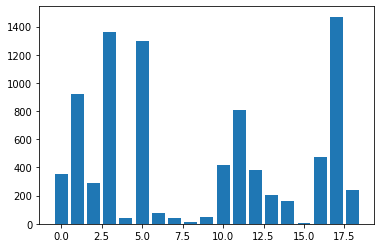

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def selc_features(x_train,y_train,x_test,n):
  fs = SelectKBest(score_func=f_regression,k=n)
  fs.fit(x_train,y_train)
  x_train_fs = fs.transform(x_train)
  #x_test_fs = fs.transform(x_test)
  return x_train_fs,fs

x_sel,fs = selc_features(x,y,x_test,15)

for i in range(len(fs.scores_)):
  print('Feature %d: %f'%(i,fs.scores_[i]))

plt.bar([i for i in range(len(fs.scores_))],fs.scores_)
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10,random_state=42)
model = LinearRegression()
#model.fit(x_train,y_train)
a = cross_val_score(model,x_sel,y,cv=cv)
a.mean()
#ypred = model.predict(x_test)

0.29974992023872044

In [ ]:
from sklearn.preprocessing import RobustScaler
trans = RobustScaler().fit(x)
x = trans.transform(x)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=3,random_state=42)
model = LinearRegression()
#model.fit(x_train,y_train)
a = cross_val_score(model,x_sel,y,cv=cv)
a.mean()
#ypred = model.predict(x_test)

NameError: ignored

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   danceability       21000 non-null  float64
 1   energy             21000 non-null  float64
 2   duration_ms        21000 non-null  float64
 3   loudness           21000 non-null  float64
 4   speechiness        21000 non-null  float64
 5   acousticness       21000 non-null  float64
 6   instrumentalness   21000 non-null  float64
 7   liveness           21000 non-null  float64
 8   valence            21000 non-null  float64
 9   tempo              21000 non-null  float64
 10  release_years_193  21000 non-null  uint8  
 11  release_years_194  21000 non-null  uint8  
 12  release_years_195  21000 non-null  uint8  
 13  release_years_196  21000 non-null  uint8  
 14  release_years_197  21000 non-null  uint8  
 15  release_years_198  21000 non-null  uint8  
 16  release_years_199  210

In [ ]:
from sklearn.ensemble import RandomForestRegressor
cv = StratifiedKFold(n_splits=3,random_state=42)
model = RandomForestRegressor(max_features=None)
a = cross_val_score(model,x,y,cv=cv)
a.mean()

0.43416694097589054

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   danceability       21000 non-null  float64
 1   energy             21000 non-null  float64
 2   duration_ms        21000 non-null  float64
 3   loudness           21000 non-null  float64
 4   speechiness        21000 non-null  float64
 5   acousticness       21000 non-null  float64
 6   instrumentalness   21000 non-null  float64
 7   liveness           21000 non-null  float64
 8   valence            21000 non-null  float64
 9   tempo              21000 non-null  float64
 10  release_years_193  21000 non-null  uint8  
 11  release_years_194  21000 non-null  uint8  
 12  release_years_195  21000 non-null  uint8  
 13  release_years_196  21000 non-null  uint8  
 14  release_years_197  21000 non-null  uint8  
 15  release_years_198  21000 non-null  uint8  
 16  release_years_199  210

In [ ]:
model = RandomForestRegressor()
model.fit(x,y)
pred = model.predict(test)

In [ ]:
pred.shape

(9000,)

In [ ]:
final = pd.DataFrame(pred,index=test_orig.id,columns=['popularity'])

In [ ]:
final.to_csv('submission.csv',index=True)